In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
from numpy import random
import matplotlib.pyplot as plt

In [3]:
# Data Frame:

data = pd.read_csv("Arrest.csv")
frame = ["OFFENSES", "INCIDENTNEIGHBORHOOD"]
dataFrame = pd.read_csv("Arrest.csv", usecols = frame)
dataFrame = dataFrame.dropna()
dataFrame.reset_index(drop=True, inplace=True)
print(dataFrame)

                                                OFFENSES  \
0                                     3929 Retail Theft.   
1           13(a)(16) Possession of Controlled Substance   
2                                     3929 Retail Theft.   
3      5503 Disorderly Conduct. / 5505 Public Drunken...   
4      2702 Aggravated Assault. / 2705 Recklessy Enda...   
...                                                  ...   
62514                           2702 Aggravated Assault.   
62515     903 Criminal Conspiracy. / 2709(a) Harassment.   
62516                                 9501 Bench Warrant   
62517  2701 Simple Assault. / 2709(a)(1) Harassment b...   
62518  907 Possessing Instruments of Crime. / 2702 Ag...   

            INCIDENTNEIGHBORHOOD  
0                     Bloomfield  
1                   Outside City  
2                       Westwood  
3                 East Allegheny  
4                Crafton Heights  
...                          ...  
62514           Crawford-Roberts  

In [4]:
hoodDictionary = dict()
ageDictionary = dict()

for i in range(len(data)):
    hood = str(data.iloc[i][10])
    if(hood in hoodDictionary):
        value = hoodDictionary[hood]
        hoodDictionary[hood] = value + 1
    else:
        hoodDictionary[hood] = 1
    
    age = str(data.iloc[i][3])
    if(age in ageDictionary):
        value = ageDictionary[age]
        ageDictionary[age] = value + 1
    else:
        ageDictionary[age] = 1
        

hoodDictionary.pop('nan')
ageDictionary.pop('nan')
ageDictionary.pop('117.0')


print(hoodDictionary)
print()
print(ageDictionary)



{'Bloomfield': 972, 'Outside City': 309, 'Westwood': 222, 'East Allegheny': 2155, 'Crafton Heights': 587, 'Greenfield': 531, 'Brookline': 1346, 'Regent Square': 36, 'East Liberty': 1855, 'East Hills': 1162, 'Carrick': 2300, 'Allegheny Center': 1227, 'South Side Flats': 3382, 'Sheraden': 1258, 'East Carnegie': 48, 'Golden Triangle/Civic Arena': 83, 'Point Breeze North': 279, 'Perry South': 1040, 'Allentown': 930, 'North Shore': 794, 'Marshall-Shadeland': 1491, 'Central Oakland': 512, 'Middle Hill': 920, 'Strip District': 492, 'Lincoln-Lemington-Belmar': 1320, 'Central Northside': 23, 'Troy Hill-Herrs Island': 6, 'Highland Park': 549, 'Homewood North': 1931, 'Northview Heights': 697, 'Brighton Heights': 1095, 'Hazelwood': 1366, 'Perry North': 585, 'Bedford Dwellings': 656, 'Elliott': 650, 'Beechview': 1167, 'Fineview': 789, 'Glen Hazel': 164, 'Spring Hill-City View': 702, 'Bluff': 1463, 'Manchester': 459, 'Homewood West': 753, 'Outside County': 55, 'Point Breeze': 297, 'Homewood South': 

Text(0, 0.5, 'Quantity of Arrests')

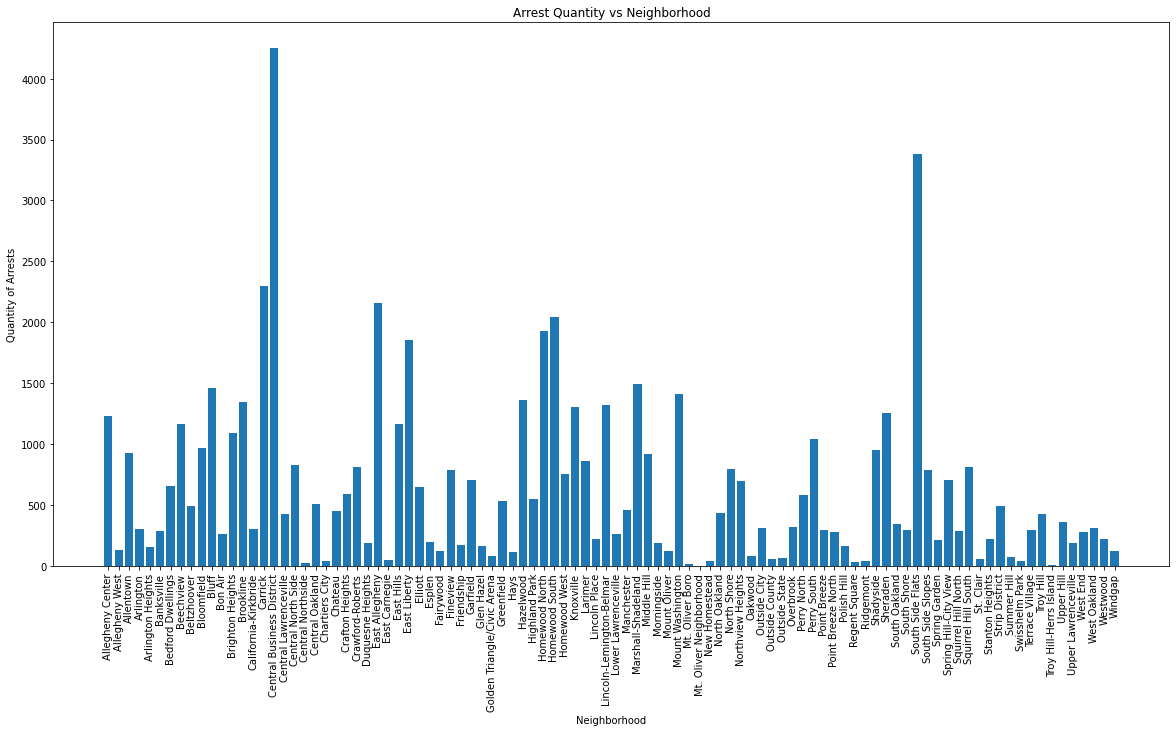

In [5]:
sortedData = dict(sorted(hoodDictionary.items()))

plt.figure(figsize=(20, 10))
plt.bar(sortedData.keys(), sortedData.values())
plt.title("Arrest Quantity vs Neighborhood")
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
plt.ylabel("Quantity of Arrests")


Due to the number of different kind of offenses, it is impossible to classify them based on severity of the infraction. Jupyter crashes when trying to make a dictionary of all the crimes. Because of this, We will be focusing on the number of crimes in a neighborhood and the age of the person committing the crime. 

Text(0, 0.5, 'Number of Arrests')

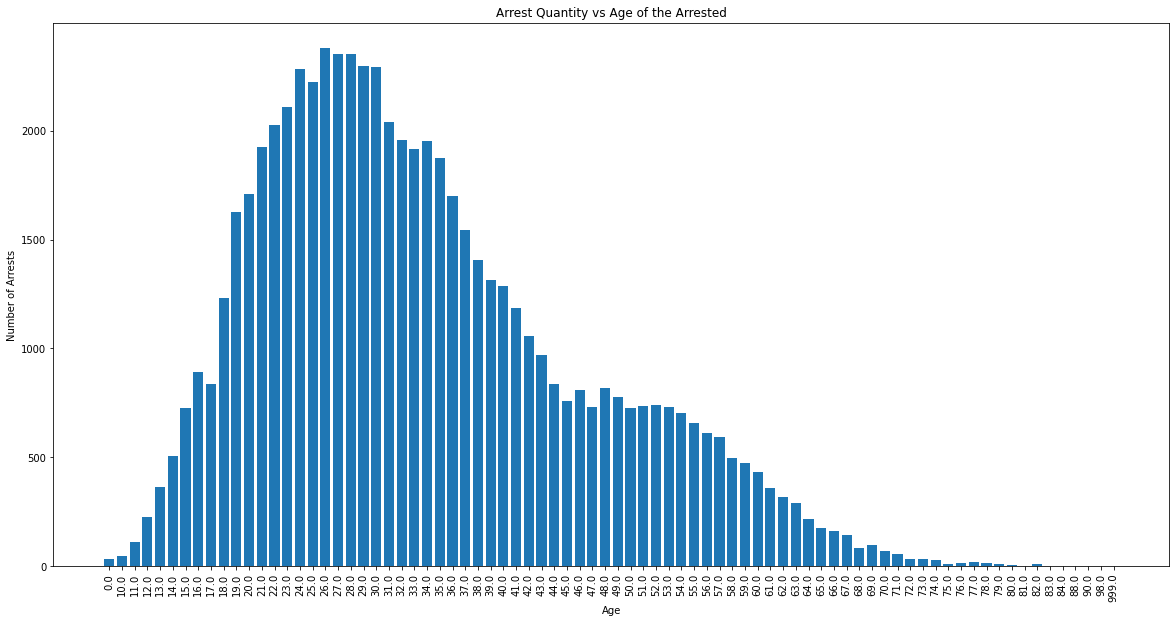

In [6]:
sortedData1 = dict(sorted(ageDictionary.items()))

plt.figure(figsize=(20, 10))
plt.bar(sortedData1.keys(), sortedData1.values())
plt.title("Arrest Quantity vs Age of the Arrested")
plt.xlabel("Age")
plt.xticks(rotation=90)
plt.ylabel("Number of Arrests")

Due to the nature of youth, we decided that the older the criminal, the worse for the area. Though there are exceptions, young people tend to do stupid things that are punishable by the law, but not the worst. We decided that if you're past your 40's and stll getting into this kind of trouble, thats a sign of the area. 

In [7]:
ageScore = {"10.0":1,"11.0":2,"12.0":3,"13.0": 4,"14.0": 5, "15.0": 6,"16.0": 7,"17.0":8, "18.0": 9, "19.0": 10,"20.0":11,"21.0": 12,"22.0":13,
              "23.0":14,"24.0": 15,"25.0":16,"26.0":17,"27.0": 18, "28.0": 19,"29.0": 20,"30.0":21, "31.0":22,"32.0":23,"33.0":24,"34.0": 25,"35.0": 26, "36.0": 27,"37.0": 28,"38.0":29, "39.0": 30, "40.0": 31,"41.0":32,"42.0": 33,"43.0":34,
              "44.0":35,"45.0": 36,"46.0":37,"47.0":38,"48.0": 39, "49.0": 40,"50.0": 41,"51.0":42,"52.0":43,"53.0":44,"54.0":45,"55.0": 46,"56.0": 47, "57.0": 48,"58.0": 49,"59.0":50, "60.0": 51, "61.0": 52,"62.0":53,"63.0": 54,"64.0":55,
              "65.0":56,"66.0": 57,"67.0":58,"68.0":59,"69.0": 60, "70.0": 61,"71.0": 62,"72.0":63,"73.0":64,"74.0":65,"75.0":66,"76.0": 67,"77.0": 68, "78.0": 69,"79.0": 70,"80.0":71, "81.0": 72, "82.0": 73,"83.0":74,"84.0": 75,"88.0":76,
              "90.0":77,"98.0": 78}

populations = {'Bloomfield': 8442, 'Westwood': 1603, 'East Allegheny': 2136, 'Crafton Heights': 6099, 'Greenfield': 7317, 'Brookline': 13214,
               'Regent Square': 928, 'East Liberty': 5869, 'nan': 1, 'East Hills': 3169, 'Carrick': 10113, 'Allegheny Center': 933, 'South Side Flats': 5726,
               'Sheraden': 5299, 'East Carnegie': 570, 'Golden Triangle/Civic Arena': 5201, 'Point Breeze North': 2054, 'Perry South': 4145,
               'North Shore': 303, 'Marshall-Shadeland': 6043, 'Central Oakland': 4106, 'Middle Hill': 1623, 'Strip District': 616, 'Lincoln-Lemington-Belmar': 4883,
               'Central Northside': 2923, 'Troy Hill-Herrs Island': 505, 'Highland Park': 1361, 'Homewood North': 1457, 'Northview Heights': 1739, 'Brighton Heights': 7402,
               'Hazelwood': 4677, 'Perry North': 4050, 'Bedford Dwellings': 1282, 'Elliott': 2381, 'Fineview': 1285, 'Glen Hazel': 716, 'Spring Hill-City View': 2648, 'Bluff': 6600, 
               'Beechview': 7974, 'Manchester': 2788, 'Homewood West': 803, 'Point Breeze': 5315, 'Homewood South': 2016, 'Squirrel Hill South': 11363, 'Terrace Village': 2728,
               'Upper Lawrenceville': 2651, 'Arlington': 2869, 'South Side Slopes': 4423, 'Lower Lawrenceville': 2290, 'Garfield': 4271, 'Lincoln Place': 3227, 'Larimer': 1728, 'Mount Washington': 8799, 
               'California-Kirkbride': 761, 'Banksville': 4144, 'Bon Air': 808, 'South Shore': 19, 'Beltzhoover': 1925, 'Knoxville': 677, 'Chateau': 11, 'Polish Hill': 1274, 'Fairywood': 1002,
               'West End': 9847, 'Crawford-Roberts': 1876, 'Shadyside': 13915, 'Morningside': 3346, 'Overbrook': 3644, 'Friendship': 1785, 'North Oakland': 9038, 'Central Lawrenceville': 4482,
               'Oakwood': 2166, 'Upper Hill': 2206, 'South Oakland': 8663, 'West Oakland': 1543, 'Spring Garden': 13151, 'Allegheny West': 462, 'St. Clair': 2762, 'Stanton Heights': 4601, 'Esplen': 301,
               'Squirrel Hill North': 11363, 'Mt. Oliver Neighborhood': 3258, 'Summer Hill': 476, 'Arlington Heights': 6015, 'Troy Hill': 2714, 'Central Business District': 5201, 'Central North Side': 2923,
               'Mount Oliver': 3340, 'Windgap': 3174, 'Duquesne Heights': 2425, 'New Homestead': 990, 'Ridgemont': 483, 'Swisshelm Park': 1361, 'Hays': 362, 'Chartiers City': 477, 'Mt. Oliver Boro': 3340,
               'Outside City': 1, 'Outside County':1, 'Allentown':2180, 'Outside State':1}


neighborhoodScore = dict()
for i in range(len(data)):
    hood = str(data.iloc[i][10])
    age = str(data.iloc[i][3])
    
    if(hood in neighborhoodScore and age in ageScore):
        value = neighborhoodScore[hood]
        neighborhoodScore[hood] = value + ageScore[age]
    elif(age in ageScore):
        neighborhoodScore[hood] = ageScore[age]

neighborhoodScore.pop('Outside City')
neighborhoodScore.pop('Outside County')
neighborhoodScore.pop('Outside State')
neighborhoodScore.pop('nan')


keys = neighborhoodScore.keys()
for i in keys:
    value = neighborhoodScore[i]
    neighborhoodScore[i] = value / populations[i]
        
print(neighborhoodScore)
    

{'Bloomfield': 3.1069651741293534, 'Westwood': 3.461010605115409, 'East Allegheny': 28.899812734082396, 'Crafton Heights': 2.028529267092966, 'Greenfield': 1.9753997539975399, 'Brookline': 2.563039200847586, 'Regent Square': 1.0075431034482758, 'East Liberty': 8.00170386777986, 'East Hills': 8.236352161565163, 'Carrick': 5.364679125877584, 'Allegheny Center': 33.046087888531616, 'South Side Flats': 12.76807544533706, 'Sheraden': 5.209473485563314, 'East Carnegie': 1.931578947368421, 'Golden Triangle/Civic Arena': 0.40069217458181117, 'Point Breeze North': 3.441090555014606, 'Perry South': 5.812303980699638, 'Allentown': 10.521100917431193, 'North Shore': 61.46864686468647, 'Marshall-Shadeland': 5.601025980473275, 'Central Oakland': 3.0962006819288845, 'Middle Hill': 15.841035120147874, 'Strip District': 20.670454545454547, 'Lincoln-Lemington-Belmar': 6.814458324800328, 'Central Northside': 0.1857680465275402, 'Troy Hill-Herrs Island': 0.2198019801980198, 'Highland Park': 9.562086700955

Text(0, 0.5, "Neighborhood's Score")

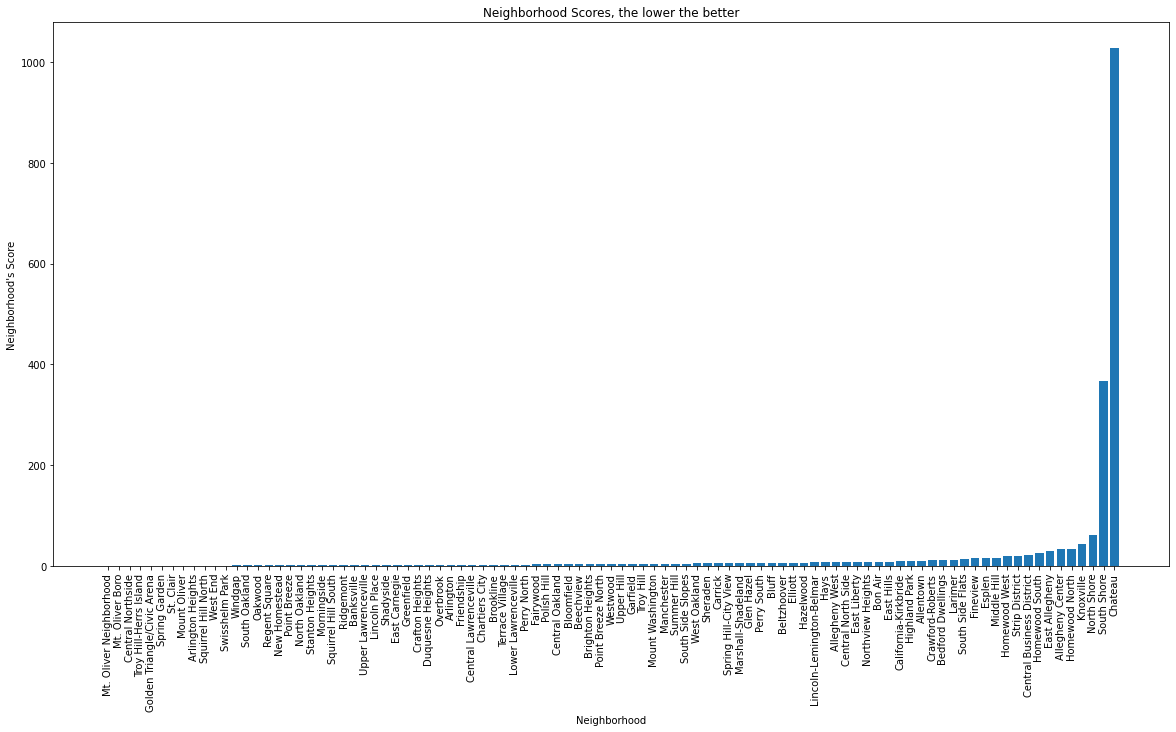

In [8]:

sortedData2 = dict(sorted(neighborhoodScore.items(), key=lambda item: item[1]))

plt.figure(figsize=(20, 10))
plt.bar(sortedData2.keys(), sortedData2.values())
plt.title("Neighborhood Scores, the lower the better")
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
plt.ylabel("Neighborhood's Score")

Lets focus in on the lower side of data to reveal the best neighborhoods

Text(0, 0.5, "Neighborhood's Score")

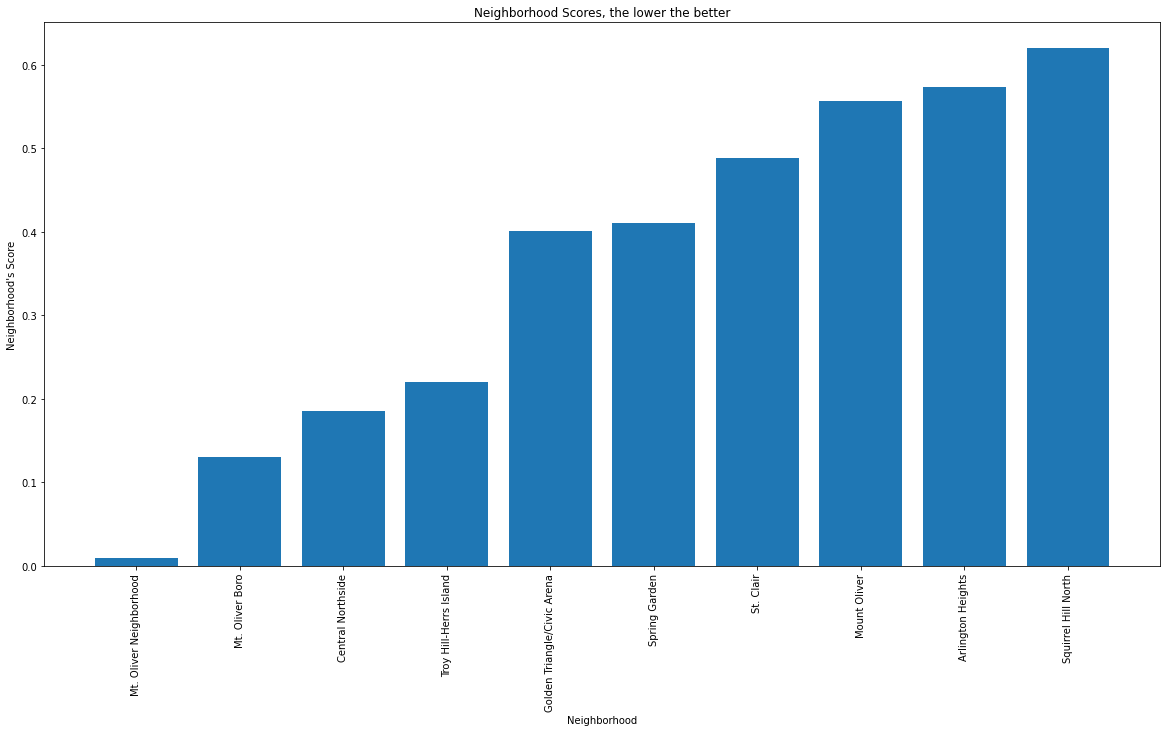

In [9]:
plt.figure(figsize=(20, 10))
one = list(sortedData2.keys())
oneTen = one[:10]
two = list(sortedData2.values())
twoTen = two[:10]
plt.bar(oneTen, twoTen)
plt.title("Neighborhood Scores, the lower the better")
plt.xlabel("Neighborhood")
plt.xticks(rotation=90)
plt.ylabel("Neighborhood's Score")

### As you can see above, all ten of these neighborhoods have excellent arrest scores and would make fantastic places to live in terms of safety. As far as arrest data goes, Mt. Oliver Neighborhood is the best with a score of 0.008901166359729895. They have, by far, the least amount of arrests in relation to their population. Chateau is the worst Pittsburgh neighborhood with a score of 1027. Keep in mind that this is also with age factored in. Chateau has the most mid-age to elderly arrest data. Mt. Oliver won in the end though because there was so few arrests and those arrests were young. Based on my metric, Mt. Oliver Neighborhood is the best. 